In [2]:
import time
import cv2
import numpy as np
import sys
import getopt
import operator
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
from skimage import feature
import scipy
from scipy import ndimage

In [3]:
def read_image(IMG_NAME):
    img = mpimg.imread(IMG_NAME)
    return img

In [4]:
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots(figsize=[10,10])
    ax.axis('off')
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()

(716, 2)


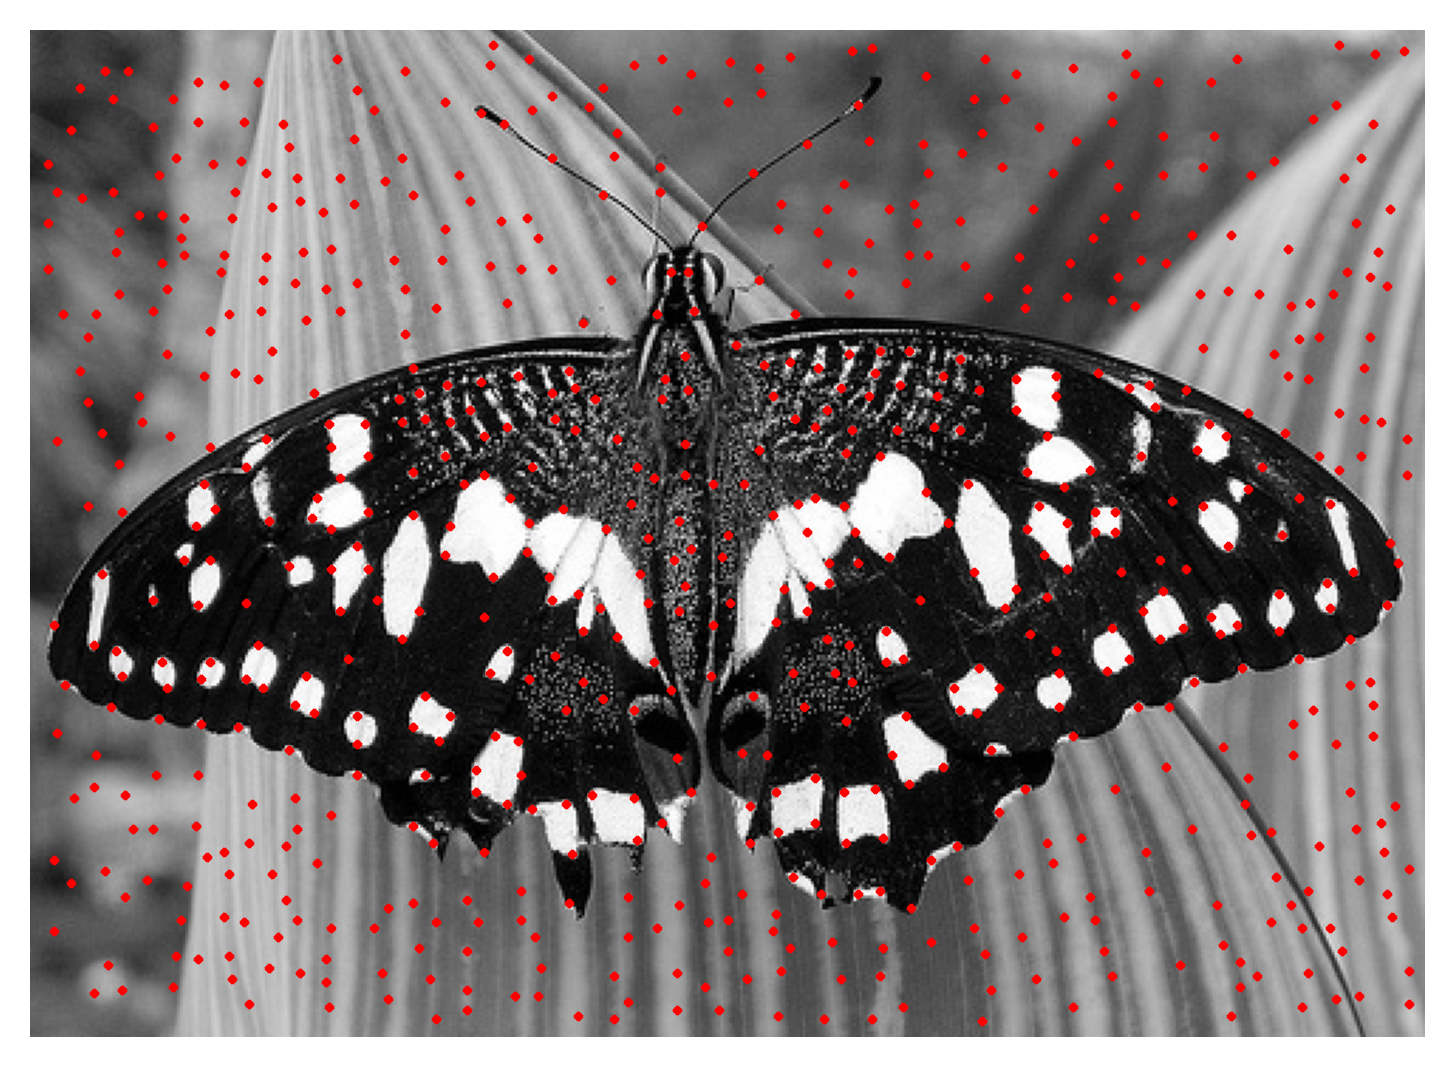

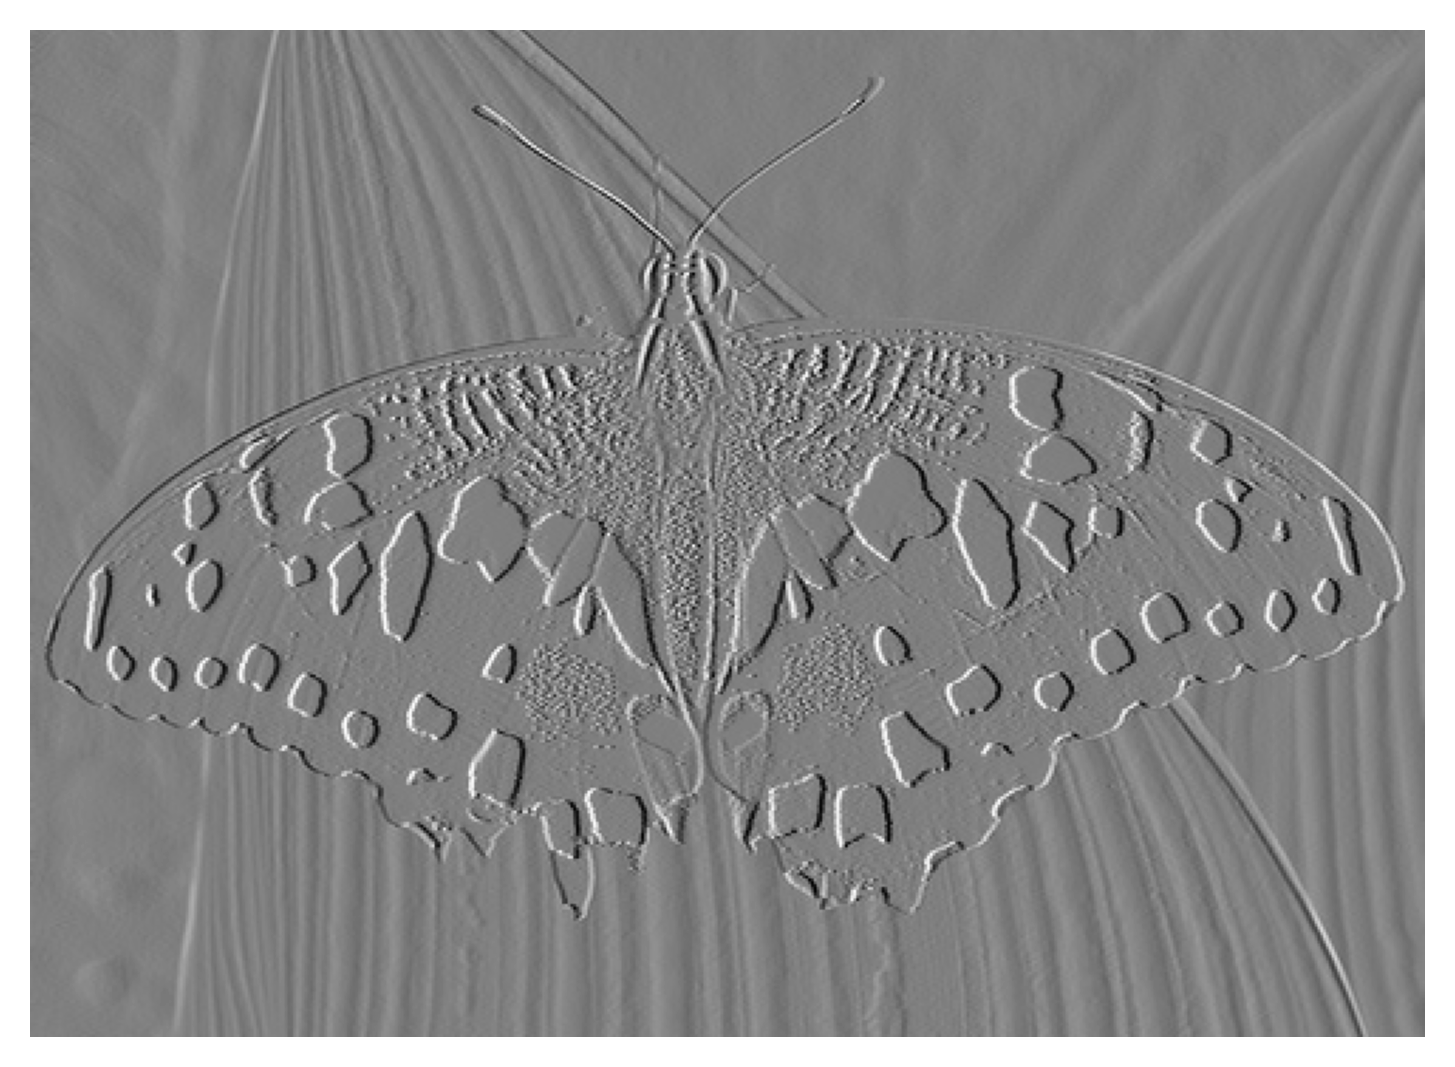

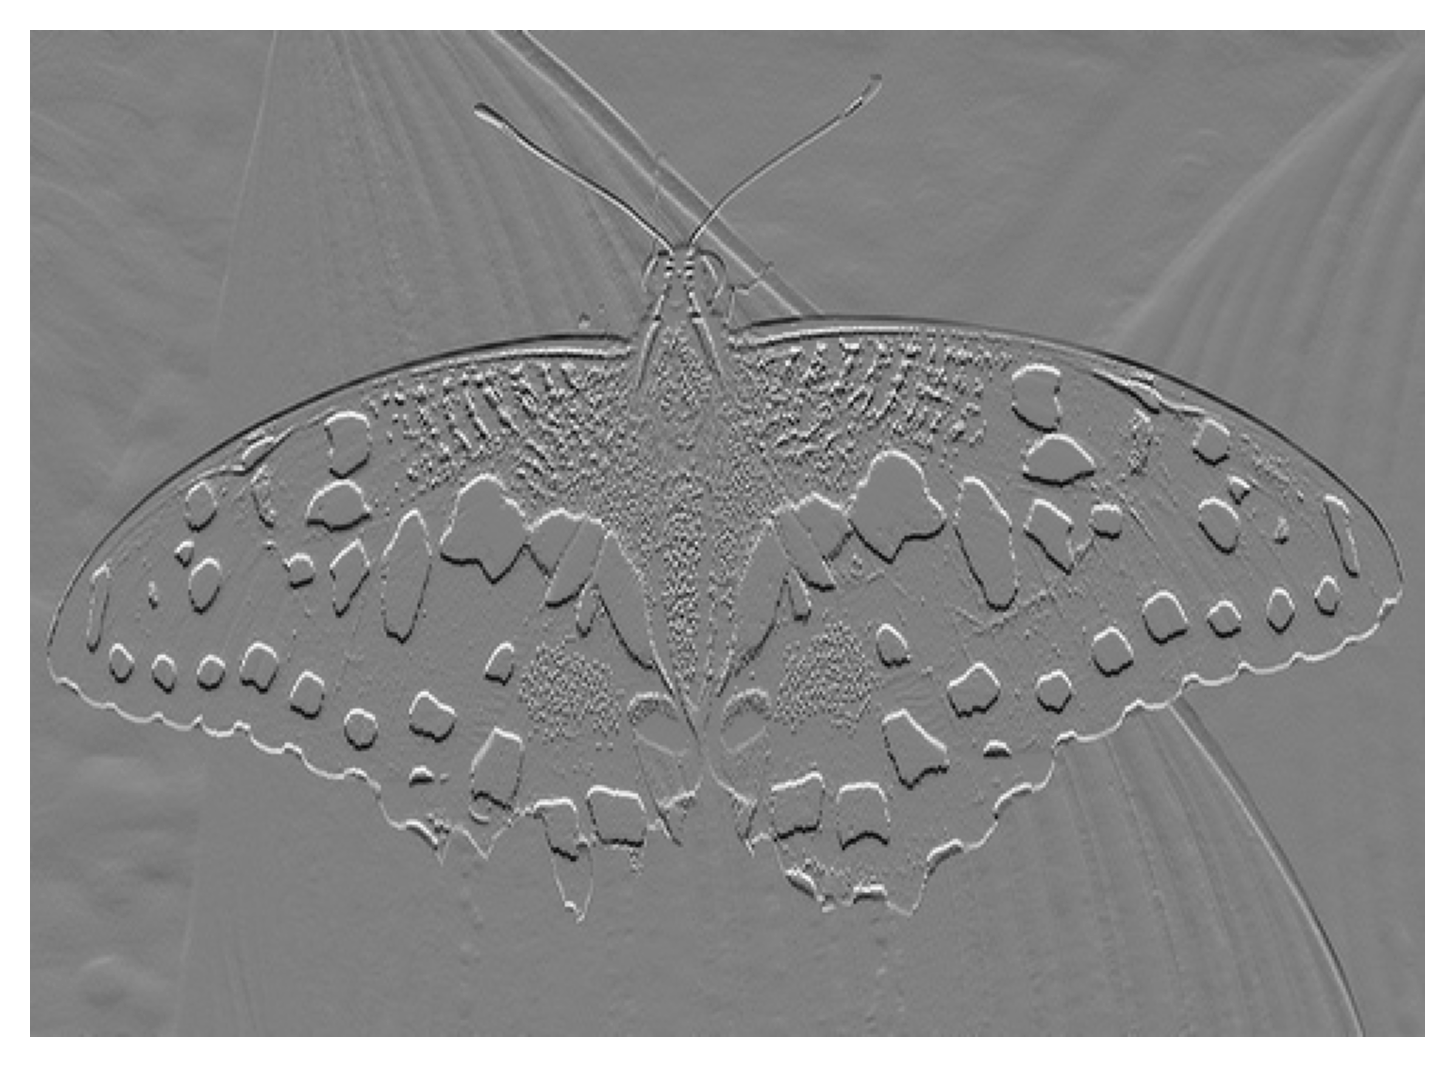

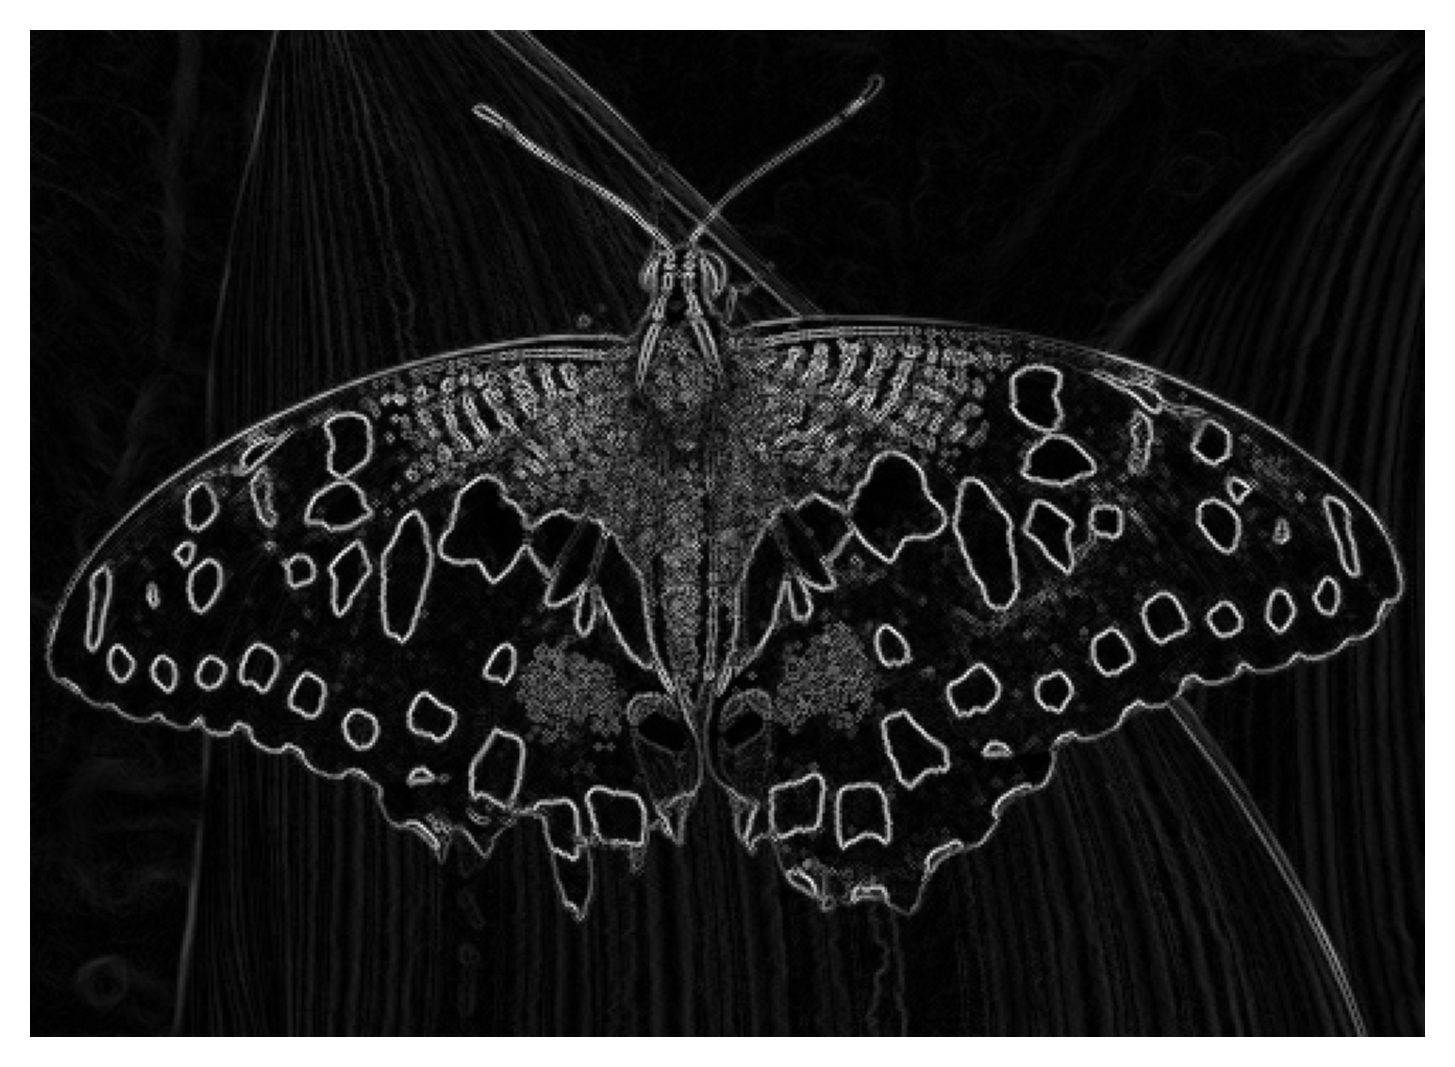

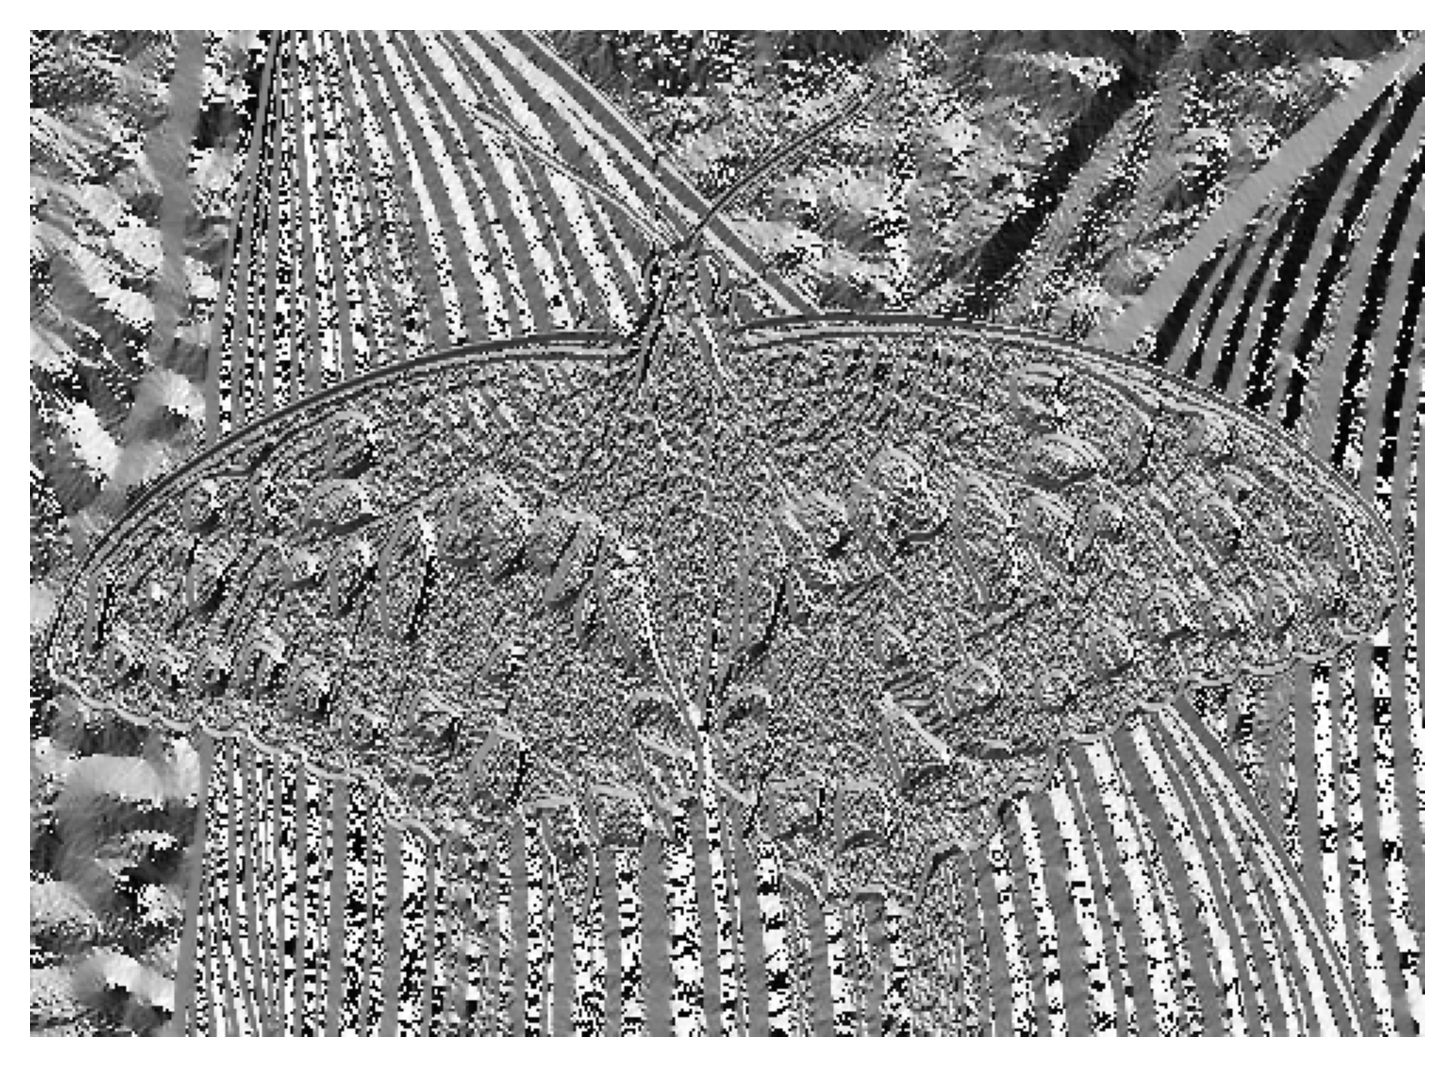

In [5]:
###part1

#Find x and y derivatives
input_image = read_image('hw3_images/butterfly.jpg')
img = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

#parameter definition
window_size = 5
k = 0.04
thresh = 10000

#gradients
dy, dx = np.gradient(img)
Ixx = dx**2
Ixy = dy*dx
Iyy = dy**2
height = img.shape[0]
width = img.shape[1]

cornerList = []
newImg = img.copy()
color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
offset = math.floor(window_size/2)

#applying gaussian filter
sigma = 0.1
Wxx = scipy.ndimage.gaussian_filter(Ixx,sigma)
Wyy = scipy.ndimage.gaussian_filter(Iyy,sigma)
Wxy = scipy.ndimage.gaussian_filter(Ixy,sigma)

#faster way to calculate elements of M matrix
window = np.ones((window_size,window_size))
Mxx = scipy.ndimage.convolve(Wxx, window, mode='constant', cval=0)
Myy = scipy.ndimage.convolve(Wyy, window, mode='constant', cval=0)
Mxy = scipy.ndimage.convolve(Wxy, window, mode='constant', cval=0)

#calculating responce
det = (Mxx*Myy)-(Mxy**2)
trace = Mxx+Myy
r = det-k*(trace**2)

#thresholding response 
r[r<thresh] = 0

#suppressing non-mac locally
locs = skimage.feature.peak_local_max(r, indices=True, min_distance=5)

B = color_img[:,:,2]
B[r==1]=255
color_img[:,:,2] = B

print(locs.shape)

fig=plt.figure(figsize=[6,6],dpi=300)
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.scatter(locs[:,1], locs[:,0], marker = 'x', color = 'r', s=2)

fig=plt.figure(figsize=[6,6],dpi=300)
plt.axis('off')
plt.imshow(dx,cmap='gray')

fig=plt.figure(figsize=[6,6],dpi=300)
plt.axis('off')
plt.imshow(dy,cmap='gray')

fig=plt.figure(figsize=[6,6],dpi=300)
plt.axis('off')
plt.imshow((dy**2+dx**2)**0.5,cmap='gray')

fig=plt.figure(figsize=[6,6],dpi=300)
plt.axis('off')
plt.imshow(np.arctan2(dy,dx),cmap='gray')
